In [1077]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [1078]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1079]:
df.shape

(8693, 14)

In [1080]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [1081]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [1082]:
df[['Group', 'NumberInGroup']] = df['PassengerId'].str.split('_', expand=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,NumberInGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [1083]:
df.drop(['Name', 'PassengerId'], axis=1, inplace=True)
df.dropna(inplace=True)

In [1084]:
counts = df['Transported'].value_counts()
counts

,count
Transported,
True,3401
False,3363


In [1085]:
df.shape

(6764, 14)

In [1086]:
df.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [1087]:
df.isna().sum()

,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [1088]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6764 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     6764 non-null   object 
 1   CryoSleep      6764 non-null   object 
 2   Cabin          6764 non-null   object 
 3   Destination    6764 non-null   object 
 4   Age            6764 non-null   float64
 5   VIP            6764 non-null   object 
 6   RoomService    6764 non-null   float64
 7   FoodCourt      6764 non-null   float64
 8   ShoppingMall   6764 non-null   float64
 9   Spa            6764 non-null   float64
 10  VRDeck         6764 non-null   float64
 11  Transported    6764 non-null   bool   
 12  Group          6764 non-null   object 
 13  NumberInGroup  6764 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 746.4+ KB


In [1089]:
df.sample(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,NumberInGroup
7691,Mars,True,F/1695/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,True,8207,01
5722,Europa,False,C/186/P,55 Cancri e,68.0,False,125.0,13437.0,0.0,22408.0,17.0,False,6064,01
109,Earth,False,F/23/P,TRAPPIST-1e,64.0,False,0.0,0.0,804.0,0.0,0.0,True,0113,01
1518,Europa,True,E/101/P,TRAPPIST-1e,47.0,False,0.0,0.0,0.0,0.0,0.0,True,1612,02
2238,Earth,False,F/490/P,TRAPPIST-1e,21.0,False,0.0,780.0,44.0,0.0,5.0,False,2398,01


In [1090]:
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,NumberInGroup,Deck,Num,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,F,1,S


In [1091]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6764 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     6764 non-null   object 
 1   CryoSleep      6764 non-null   object 
 2   Cabin          6764 non-null   object 
 3   Destination    6764 non-null   object 
 4   Age            6764 non-null   float64
 5   VIP            6764 non-null   object 
 6   RoomService    6764 non-null   float64
 7   FoodCourt      6764 non-null   float64
 8   ShoppingMall   6764 non-null   float64
 9   Spa            6764 non-null   float64
 10  VRDeck         6764 non-null   float64
 11  Transported    6764 non-null   bool   
 12  Group          6764 non-null   object 
 13  NumberInGroup  6764 non-null   object 
 14  Deck           6764 non-null   object 
 15  Num            6764 non-null   object 
 16  Side           6764 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 904.9+ K

In [1092]:
df['Num'] = df['Num'].astype(int)
df['Group'] = df['Group'].astype(int)
df['NumberInGroup'] = df['NumberInGroup'].astype(int)

In [1093]:
cols_to_encode = ['HomePlanet', 'Destination', 'Deck', 'Side']

In [1094]:
counts = df[cols_to_encode].nunique()
counts

,0
HomePlanet,3
Destination,3
Deck,8
Side,2


In [1095]:
df.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [1096]:
df.isna().sum()

,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [1097]:
df.shape

(6764, 17)

In [1098]:
def remove_outliers(df, num_cols, threshold=2):
    df_clean = df.copy()

    for col in num_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean
df = remove_outliers(df, ['Age'])
df.shape

(6758, 17)

In [1099]:
hotenc = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

encoded_cols = hotenc.fit_transform(df[cols_to_encode])
encoded_df = pd.DataFrame(encoded_cols, columns=hotenc.get_feature_names_out(cols_to_encode), index=df.index)

df_encoded = pd.concat([df.drop(columns=cols_to_encode), encoded_df], axis=1)
df_encoded.sample(5)

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
5864,True,F/1279/P,59.0,False,0.0,0.0,0.0,0.0,0.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7367,False,G/1269/P,18.0,False,0.0,0.0,32.0,0.0,673.0,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7027,False,G/1209/P,25.0,False,0.0,1435.0,0.0,0.0,0.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5406,False,F/1197/P,23.0,False,610.0,858.0,75.0,1358.0,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7020,True,F/1545/P,43.0,False,0.0,0.0,0.0,0.0,0.0,True,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1100]:
df_encoded.shape

(6758, 25)

In [1101]:
df_encoded.columns

Index(['CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Group',
       'NumberInGroup', 'Num', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_S'],
      dtype='object')

In [1102]:
df_encoded.drop('Cabin', axis=1, inplace=True)

In [1103]:
df_encoded.sample(5)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
7562,False,18.0,False,595.0,134.0,7.0,0.0,0.0,False,8083,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6781,True,20.0,False,0.0,0.0,0.0,0.0,0.0,True,7160,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4310,False,64.0,False,77.0,2424.0,0.0,3001.0,127.0,False,4594,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4690,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,5003,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5181,False,18.0,False,0.0,288.0,35.0,0.0,435.0,False,5528,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1104]:
df_encoded.isnull().sum()

,0
CryoSleep,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
Transported,0
Group,0


In [1105]:
df_encoded.shape

(6758, 24)

In [1106]:
df_encoded['CryoSleep'] = df_encoded['CryoSleep'].replace({True: 1, False: 0})
df_encoded['VIP'] = df_encoded['VIP'].replace({True: 1, False: 0})
df_encoded['Transported'] = df_encoded['Transported'].replace({True: 1, False: 0})

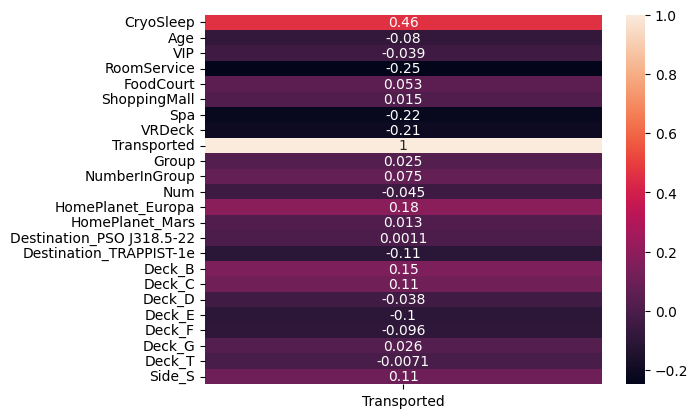

In [1107]:
sns.heatmap(df_encoded.corr()[['Transported']], annot=True)
plt.show()

In [1108]:
df_encoded.sample(5)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
1676,0,21.0,0,0.0,0.0,809.0,0.0,0.0,0,1776,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6769,1,25.0,0,0.0,0.0,0.0,0.0,0.0,1,7149,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5223,1,19.0,0,0.0,0.0,0.0,0.0,0.0,1,5572,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7755,1,32.0,0,0.0,0.0,0.0,0.0,0.0,1,8275,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6840,0,22.0,0,741.0,0.0,1028.0,0.0,0.0,0,7227,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1109]:
df_encoded['TotalSpent'] = df_encoded['RoomService'] + df_encoded['FoodCourt'] + df_encoded['ShoppingMall'] + df_encoded['Spa'] + df_encoded['VRDeck']
df_encoded['SuperFeature'] = df_encoded['TotalSpent'] * df_encoded['Age']

In [1110]:
l1 = Lasso(alpha=0.01)
l1.fit(df_encoded.drop('Transported', axis=1), df_encoded['Transported'])
for feature, coef in zip(df_encoded.drop('Transported', axis=1).columns, l1.coef_):
    print(f"{feature}: {coef}")

CryoSleep: 0.3608496020229851
Age: -0.00240349986412218
VIP: -0.0
RoomService: -0.0001300781969085624
FoodCourt: 3.312500008772015e-05
ShoppingMall: 6.96822166646163e-05
Spa: -9.93726460536409e-05
VRDeck: -9.59358391311689e-05
Group: 6.987853188399993e-06
NumberInGroup: 0.004382138275559981
Num: -2.024997262880853e-05
HomePlanet_Europa: 0.1483997148858048
HomePlanet_Mars: 0.0
Destination_PSO J318.5-22: -0.0
Destination_TRAPPIST-1e: -0.0
Deck_B: 0.0
Deck_C: 0.0
Deck_D: 0.0
Deck_E: -0.0
Deck_F: 0.0
Deck_G: -0.021176733188618513
Deck_T: 0.0
Side_S: 0.05276826594843489
TotalSpent: -3.1346653927689836e-09
SuperFeature: 3.9406350940359833e-07


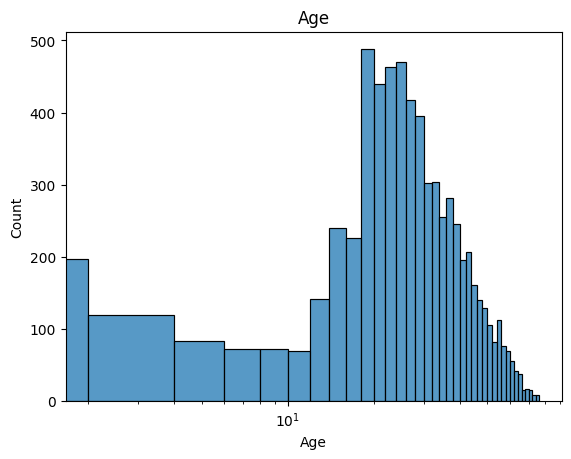

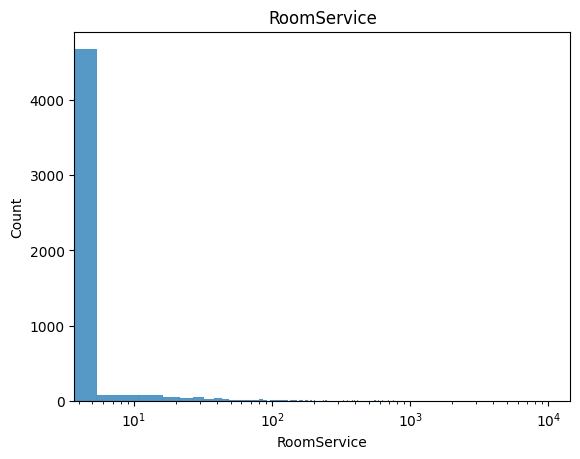

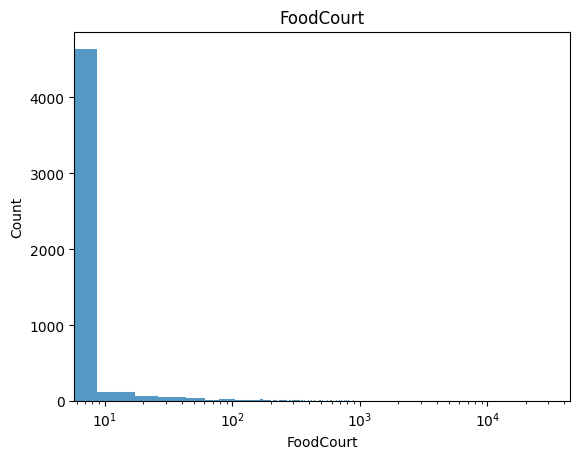

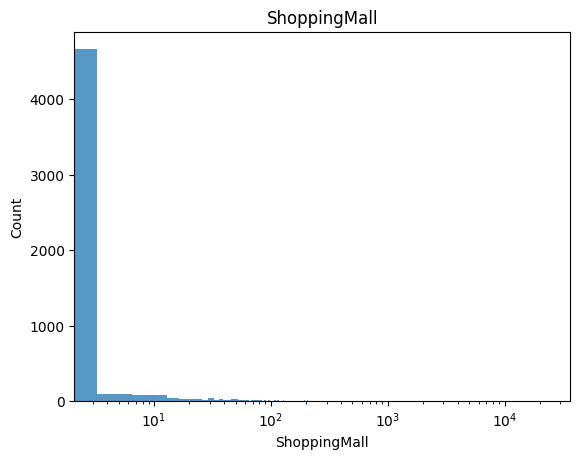

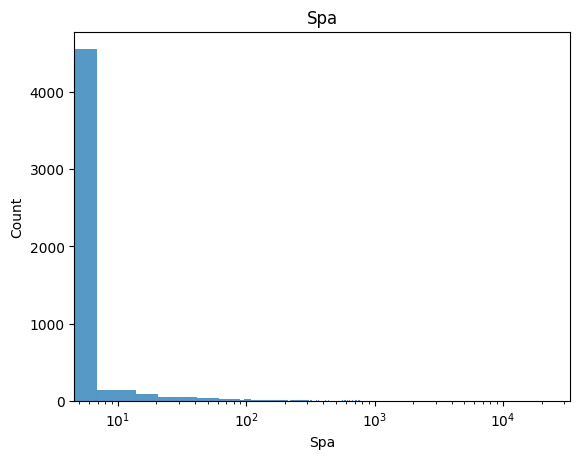

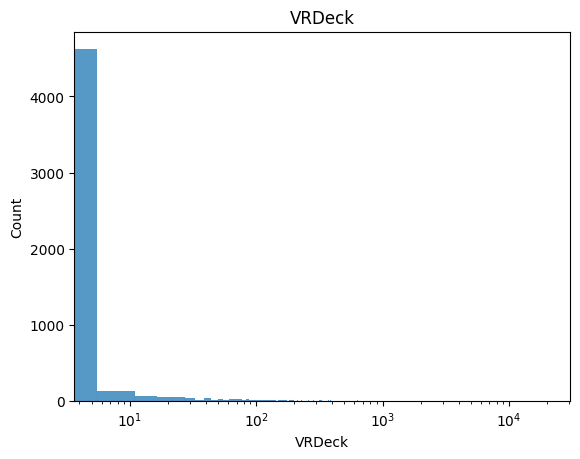

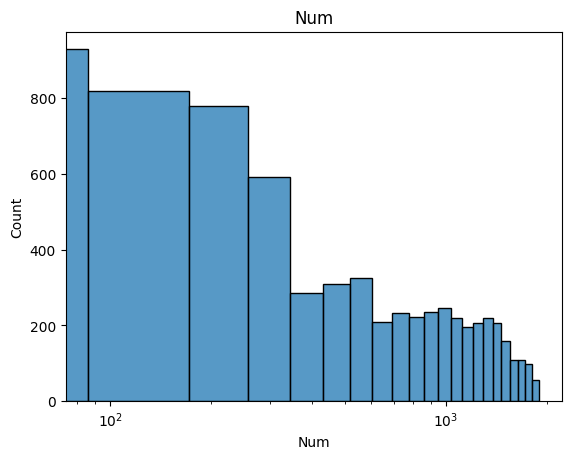

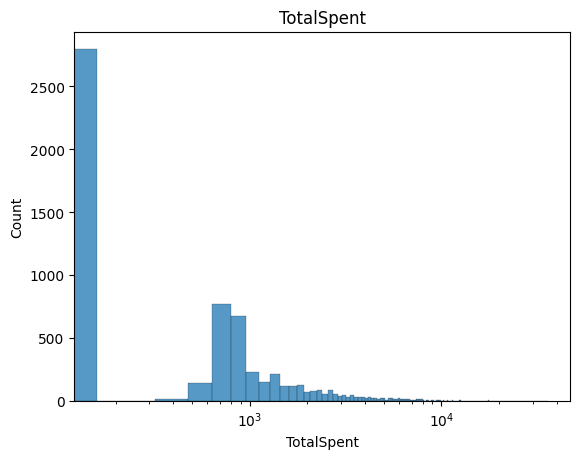

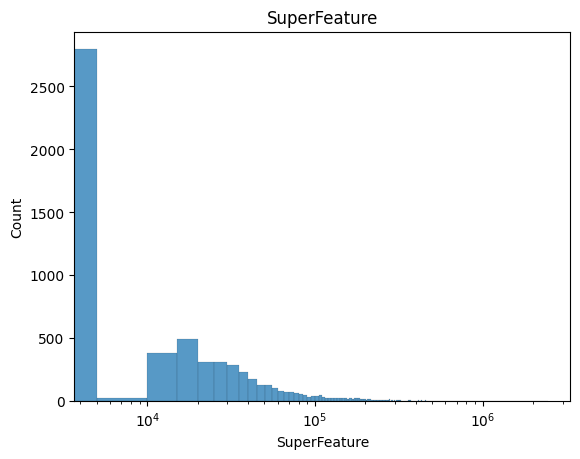

In [1111]:
cols_to_hist = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num', 'TotalSpent', 'SuperFeature']
for col in cols_to_hist:
    sns.histplot(df_encoded[col])
    plt.title(col)
    plt.xscale('log')
    plt.show()

In [1112]:
standscale = StandardScaler()
df_encoded['Age'] = standscale.fit_transform(df_encoded[['Age']])

In [1113]:
cols_to_minmax_scale = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num', 'TotalSpent', 'SuperFeature']
minmaxscale = MinMaxScaler()
df_encoded[cols_to_minmax_scale] = minmaxscale.fit_transform(df_encoded[cols_to_minmax_scale])

In [1114]:
df_encoded.sample(5)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,TotalSpent,SuperFeature
2200,0,1.116581,1,0.077923,0.002750,0.000000,0.000268,0.000000,0,2356,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.023925,0.015833
2355,0,-0.404802,0,0.000000,0.000302,0.012430,0.001562,0.017162,1,2537,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.019035,0.006438
7409,1,-0.335649,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,7918,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000
2064,1,-0.888879,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,2210,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000
2308,0,-0.197341,0,0.055645,0.006440,0.001277,0.000000,0.000049,0,2486,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.021536,0.008234


In [1115]:
X = df_encoded.drop('Transported', axis=1)
y = df_encoded['Transported']

In [1116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1117]:
lg = LogisticRegression(max_iter=3000)
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)
accuracy_score(y_test, y_pred_lg)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lg)}")

Accuracy: 0.738905325443787


In [1118]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest)}")

Accuracy: 0.8054733727810651


In [1119]:
"""
importance = forest.feature_importances_
plt.bar(X_train.columns, importance)
plt.xticks(rotation=90)
plt.show()
"""

'\nimportance = forest.feature_importances_\nplt.bar(X_train.columns, importance)\nplt.xticks(rotation=90)\nplt.show()\n'

In [1120]:
extreme_gb = XGBClassifier()
extreme_gb.fit(X_train, y_train)
y_pred_extreme_gb = extreme_gb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_extreme_gb)}")

Accuracy: 0.8054733727810651


In [1121]:
extra_tree = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.6500000000000001, min_samples_leaf=3, min_samples_split=9, n_estimators=100)
extra_tree.fit(X_train, y_train)
y_pred_extra_tree = extra_tree.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_extra_tree)}")

Accuracy: 0.7928994082840237


In [1122]:
y_like_ensembled = y_pred_extra_tree + y_pred_extreme_gb + y_pred_lg
y_like_ensembled = np.where(y_like_ensembled >= 2, 1, 0)
print(f"Accuracy: {accuracy_score(y_test, y_like_ensembled)}")

Accuracy: 0.7995562130177515


In [1123]:
voting_clf = VotingClassifier(estimators=[
    ('extreme_gb', extreme_gb),
    ('lg', lg),
    ('forest', forest),
    ], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting_clf = voting_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting_clf)}")

Accuracy: 0.8099112426035503


In [1124]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [1125]:
print((test['RoomService']!=0).sum())

1551


In [1126]:
test.isnull().sum()

,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98


In [1127]:
test.shape

(4277, 13)

In [1128]:
test_final = test.copy()
test_final[['Group', 'NumberInGroup']] = test_final['PassengerId'].str.split('_', expand=True)
test_final['Group'] = test_final['Group'].astype(int)
test_final['NumberInGroup'] = test_final['NumberInGroup'].astype(int)
test_final.drop(['Name', 'PassengerId'], axis=1, inplace=True)
mean_age = test_final['Age'].mean()
test_final['Age'].fillna(mean_age, inplace=True)
test_final['VIP'].fillna(False, inplace=True)
test_final['HomePlanet'].fillna("Earth", inplace=True)
test_final['CryoSleep'].fillna(False, inplace=True)
test_final['Cabin'].ffill(inplace=True)
test_final['Cabin'].bfill(inplace=True)
test_final['Destination'].fillna("TRAPPIST-1e", inplace=True)
mean_roomservice = test_final['RoomService'].mean()
test_final['RoomService'].fillna(mean_roomservice, inplace=True)
mean_foodcourt = test_final['FoodCourt'].mean()
test_final['FoodCourt'].fillna(mean_foodcourt, inplace=True)
mean_shoppingmall = test_final['ShoppingMall'].mean()
test_final['ShoppingMall'].fillna(mean_shoppingmall, inplace=True)
mean_spa = test_final['Spa'].mean()
test_final['Spa'].fillna(mean_spa, inplace=True)
mean_vrdeck = test_final['VRDeck'].mean()
test_final['VRDeck'].fillna(mean_vrdeck, inplace=True)
test_final[['Deck', 'Num', 'Side']] = test_final['Cabin'].str.split('/', expand=True)
test_final['Num'] = test_final['Num'].astype(int)

cols_to_encode = ['HomePlanet', 'Destination', 'Deck', 'Side']
encoded_cols = hotenc.transform(test_final[cols_to_encode])
encoded_test_final = pd.DataFrame(encoded_cols, columns=hotenc.get_feature_names_out(cols_to_encode), index=test_final.index)
test_final_encoded = pd.concat([test_final.drop(columns=cols_to_encode), encoded_test_final], axis=1)


test_final_encoded.drop('Cabin', axis=1, inplace=True)
test_final_encoded['CryoSleep'] = test_final_encoded['CryoSleep'].replace({True: 1, False: 0})
test_final_encoded['VIP'] = test_final_encoded['VIP'].replace({True: 1, False: 0})

test_final_encoded['TotalSpent'] = test_final_encoded['RoomService'] + test_final_encoded['FoodCourt'] + test_final_encoded['ShoppingMall'] + test_final_encoded['Spa'] + test_final_encoded['VRDeck']
test_final_encoded['SuperFeature'] = test_final_encoded['TotalSpent'] * test_final_encoded['Age']
test_final_encoded['Age'] = standscale.transform(test_final_encoded[['Age']])
test_final_encoded[cols_to_minmax_scale] = minmaxscale.transform(test_final_encoded[cols_to_minmax_scale])

In [1129]:
test_final_encoded.shape

(4277, 25)

In [1130]:
final_pred = pd.Series(extra_tree.predict(test_final_encoded))
final_pred.replace({1: True, 0: False}, inplace=True)
final_pred.head()

,0
0,True
1,False
2,True
3,True
4,False


In [1131]:
extra_final_tree = extra_tree.predict(test_final_encoded)
y_pred_final_gb = extreme_gb.predict(test_final_encoded)
y_pred_final_lg = lg.predict(test_final_encoded)

y_like_ensembled = extra_final_tree + y_pred_final_gb + y_pred_final_lg
final_pred = np.where(y_like_ensembled >= 2, 1, 0)

In [1132]:
final_pred = pd.Series(final_pred)
final_pred.replace({1: True, 0: False}, inplace=True)
final_pred.head()

,0
0,True
1,False
2,True
3,True
4,False


In [1133]:
final_df = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': final_pred
})
final_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [1134]:
final_df.to_csv('Submission.csv', index=False)